Data Exploration
================

First of all we need to discover our dataset as is

## 1) Import neccesary libraries

In [1]:
import os
import cv2
import json
import numpy as np 
from PIL import Image

NUM_SAMPLES = 3083
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3
NUM_CLASSES = 3
TRAIN_PATH = '../data'

PREFETCH = False

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Load our dataset

In [3]:
x_train = np.load(f'{TRAIN_PATH}/x_train.npy')
y_train = np.load(f'{TRAIN_PATH}/y_train.npy')

In [4]:
assert x_train.shape[slice(None, -1, None)] == y_train.shape[slice(None, -1, None)], "Dataset are not symmetrical"

Look at the data as is

In [5]:
img_idx = 1

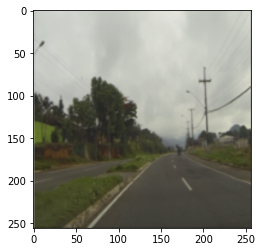

In [6]:
plt.imshow(x_train[img_idx])

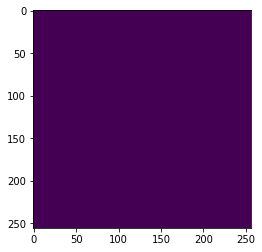

In [7]:
plt.imshow(y_train[img_idx])

We need to apply OHE to examine or data mush better

## 3) Preprocessing stage

In [8]:
def apply_ohe(sample, index_shape, n_classes):
    new_shape = (*index_shape, n_classes)
    responce_tensor = np.zeros(new_shape)
    for img_class in range(n_classes):
        responce_tensor[:,:,:,img_class] = (sample == img_class).reshape(index_shape)
    return responce_tensor

In [9]:
if PREFETCH:
    ohe_y_train = np.load(f'{TRAIN_PATH}/ohe_y_train.npy')
else:
    ohe_y_train = apply_ohe(y_train, (NUM_SAMPLES, IMG_HEIGHT, IMG_WIDTH), 3)
#   np.save(f'{TRAIN_PATH}/ohe_y_train.npy', ohe_y_train)

In [10]:
ohe_y_train.shape

(3083, 256, 256, 3)

In [11]:
img_idx = 1232

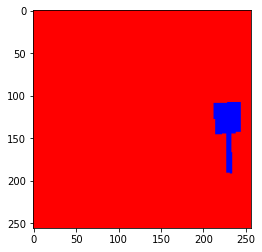

In [12]:
plt.imshow(ohe_y_train[img_idx])

## 4) Examine data

In [13]:
def calculate_stat(labels):
    raw_classes = labels.reshape((NUM_SAMPLES, IMG_HEIGHT*IMG_WIDTH))
    stat = np.zeros(((NUM_SAMPLES, 3)))
    for i in range(NUM_CLASSES):
        stat[:,i] = np.sum(raw_classes == i, axis=1)
    return stat / (IMG_HEIGHT*IMG_WIDTH)

In [14]:
stat = calculate_stat(y_train)

In [15]:
class_cnt = [np.sum(stat[:, c_num] != 0) for c_num in range(NUM_CLASSES)]

print(f"""
    Percentage of images with class 0 (background)      - {class_cnt[0] / NUM_SAMPLES}
    Percentage of images with class 1 (crosswalk)       - {class_cnt[1] / NUM_SAMPLES}
    Percentage of images with class 2 (road signs)      - {class_cnt[2] / NUM_SAMPLES}
""")


    Percentage of images with class 0 (background)      - 1.0
    Percentage of images with class 1 (crosswalk)       - 0.6837495945507622
    Percentage of images with class 2 (road signs)      - 0.5663314952967888



Text(0.5, 1.0, 'Histogram of background part in image')

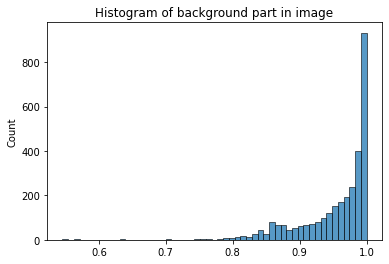

In [16]:
sns.histplot(stat[:,0]).set_title('Histogram of background part in image')

Text(0.5, 1.0, 'Histogram of crosswalk part in image')

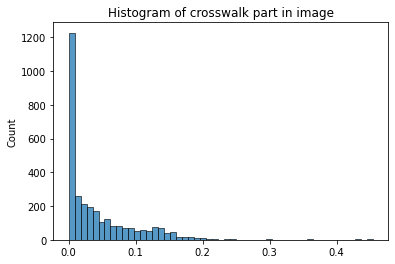

In [17]:
sns.histplot(stat[:,1]).set_title('Histogram of crosswalk part in image')

Text(0.5, 1.0, 'Histogram of road signs part in image')

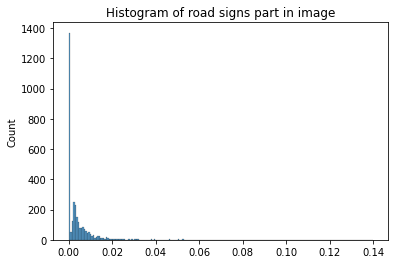

In [18]:
sns.histplot(stat[:,2]).set_title('Histogram of road signs part in image')

## As we see second class is much smaller by total pixels in comparison with the crosswalk class 